<a href="https://colab.research.google.com/github/mikiereed/automate_python_test_code/blob/master/introtoML_Ch1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [61]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [62]:
print(iris_dataset['DESCR'][:1000] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [63]:
print(f"Target Names: {iris_dataset['target_names']}")

Target Names: ['setosa' 'versicolor' 'virginica']


In [64]:
print(f'Feature Names: {iris_dataset["feature_names"]}')

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [65]:
print(f'Type of Data: {type(iris_dataset["data"])}')

Type of Data: <class 'numpy.ndarray'>


In [66]:
print(f'Shape of Data: {iris_dataset["data"].shape}')

Shape of Data: (150, 4)


In [67]:
print(f'First five rows of data\n {iris_dataset["data"][:5]}')

First five rows of data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [68]:
print(f'Type of Target: {type(iris_dataset["target"])}')

Type of Target: <class 'numpy.ndarray'>


In [69]:
print(f'Shape of Target: {iris_dataset["target"].shape}')

Shape of Target: (150,)


In [70]:
print(f'Target:\n {iris_dataset["target"]}')
# 0 setosa
# 1 versicolor
# 2 virginica

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'])

In [72]:
from collections import Counter
test_target_counts = Counter(y_test)
print(f'Test Set Targets:\n {test_target_counts}')

Test Set Targets:
 Counter({0: 15, 2: 12, 1: 11})


In [73]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [74]:
pip install mglearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868e57d6a0>,
      dtype=object)

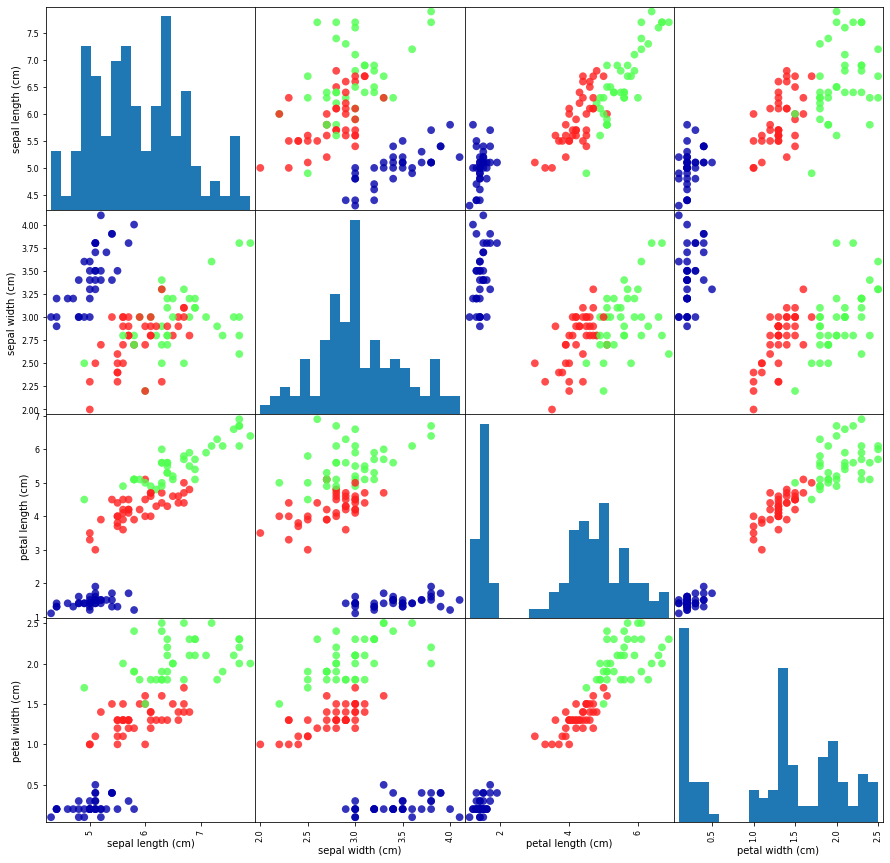

In [75]:
import pandas as pd
import mglearn

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [78]:
import numpy as np

X_new = np.array([[5, 2.9, 1, .2]])
print('X_new.shape', X_new.shape)

X_new.shape (1, 4)


In [80]:
prediction = knn.predict(X_new)
print('Prediction:', prediction)
print('Predicted target name:', iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [82]:
y_pred = knn.predict(X_test)
print('Test Set Predictions:\n', y_pred)
print('Actual:\n', y_test)

Test Set Predictions:
 [2 2 2 1 0 2 2 2 0 2 0 1 0 1 1 0 1 0 2 2 2 0 2 0 1 1 1 0 2 0 0 0 0 2 0 1 0
 1]
Actual:
 [2 2 2 1 0 2 2 2 0 1 0 1 0 1 1 0 2 0 2 2 2 0 2 0 1 1 1 0 1 0 0 0 0 2 0 1 0
 1]


In [84]:
print(f'Test Set Score: {np.mean(y_pred == y_test):.2f}')

Test Set Score: 0.92


In [86]:
print(f'Test Set Score: {knn.score(X_test, y_test):.2f}')
print(f'Train Set Score: {knn.score(X_train, y_train):.2f}') 
# 1.00 because each matches up perfectly with "neighbor"

Test Set Score: 0.92
Train Set Score: 1.00


In [101]:
# summary of code completed

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f'Test set score: {knn.score(X_test, y_test)}')

Test set score: 0.9736842105263158
